# Começando a pensar no projeto

## BRAIN STORM

- Objetivo é lidar com um problema real, e tentar resolver ele usando: Classificação ou Regressão.
- Tente fazer uma análise bem abrangente, explicando cada etapa e justificando cada ação escolhida.
- Incluir gráficos e tabelas comparativas pode ajudar muito!

## BASE DE DADOS

**Faça escolha de um dataset da sua preferencia!**

Você pode procurar conjuntos de dados aqui:

1. No repositório da <a href="https://archive.ics.uci.edu/ml/datasets.php" target="_blank">UCI</a>.
1. No <a href="https://www.kaggle.com/datasets" target="_blank">Kaggle</a>.

## INICIANDO O PROJETO

**Carregando as bibliotecas**

In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)

In [134]:
# Carregue o seu conjunto de dados ...

**Definindo o problema**

Aqui começa uma etapa de reflexão. Pense em um possivel problema que você poderia resolver usando os dados que tem disponíveis, por exemplo:

- Se escolhi um conjunto de dados com informações de vinhos e os preços deles, meu problema poderia ser tentar fazer a descobrir o preço de um vinho (que ainda não saiu no mercado) com base nas caracteristicas dele.

In [135]:
# detalhe aqui qual o problema que vai tentar resolver e explique por que seria um problema de classificação ou regressão ...

## ANÁLISE E EXPLORAÇÃO DOS DADOS

**Faça uma análise detalhada do conjunto de dados escolhidos.**

- Identifique os tipos de dados de cada coluna e caso seja necessário, faça uma conversão no tipo de dado. Em muitas situações é interessante renomear as colunas.
- Verifique se existem valores nulos, e caso existam, elabore uma estrategia para lidar com eles (apagar eles, substituir com outro valor, etc.).
- Faça uma análise estatistica dos dados para determinar aqueles que provavelmente não vão contribuir durante a modelagem (anomalías e outrliers).
- Pode aplicar escalonamento nos dados, para manter todos eles na mesma escala.
- Caso tenha features do tipo categorico e queria usar elas durante a modelagem, transforme elas para um valor numerico (encoding!).

In [136]:
# Comece aqui ...

## MODELAGEM

#### 1. Importar a **classe do estimador que se deseja treinar** - escolher a hipótese!

- Identifique o problema com o qual está lidando (classificação ou regressão).
- Dependendo ao problema, faça escolha de qual estimador deseja usar para sua modelagem (pode escolher mais de uma para fins de teste!).

In [137]:
# Importe aqui ...
# Load data
data = pd.read_csv('dados/CO2 Emissions_Canada.csv', sep=',')

rename_columns = {
    'Make': "make",
    'Model': "model",
    'Vehicle Class': "vehicle_class",
    'Engine Size(L)': "engine_size",
    'Cylinders': "cylinders",
    'Transmission': "transmission",
    'Fuel Type': "fuel_type",
    'Fuel Consumption City (L/100 km)': "fuel_cons_city",
    'Fuel Consumption Hwy (L/100 km)': "fuel_cons_hwy",
    'Fuel Consumption Comb (L/100 km)': "fuel_cons_comb",
    'Fuel Consumption Comb (mpg)': "fuel_cons_comb_mpg",
    'CO2 Emissions(g/km)': "co2",
}

data = data.rename(columns=rename_columns)



In [138]:
data.dtypes

make                   object
model                  object
vehicle_class          object
engine_size           float64
cylinders               int64
transmission           object
fuel_type              object
fuel_cons_city        float64
fuel_cons_hwy         float64
fuel_cons_comb        float64
fuel_cons_comb_mpg      int64
co2                     int64
dtype: object

In [139]:
data.describe()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [140]:
len(set(data.make))

42

In [141]:
len(set(data.model))

2053

In [142]:
data.vehicle_class.value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

In [143]:
data.transmission.value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: transmission, dtype: int64

In [144]:
data.fuel_type.value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

In [145]:
data_numerical = data[['engine_size', 'cylinders', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'co2']]

In [146]:
corr_data = data_numerical.corr()

<AxesSubplot: >

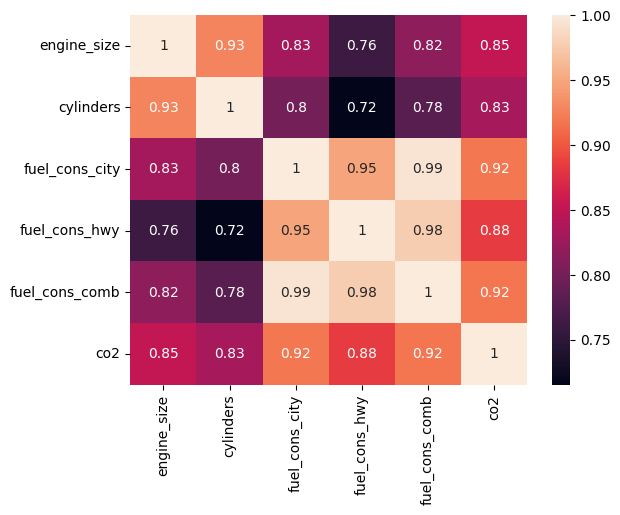

In [147]:
sns.heatmap(data=corr_data, annot=True)

In [148]:
data.drop(columns=['fuel_cons_comb', 'fuel_cons_comb_mpg'], inplace=True)
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,244


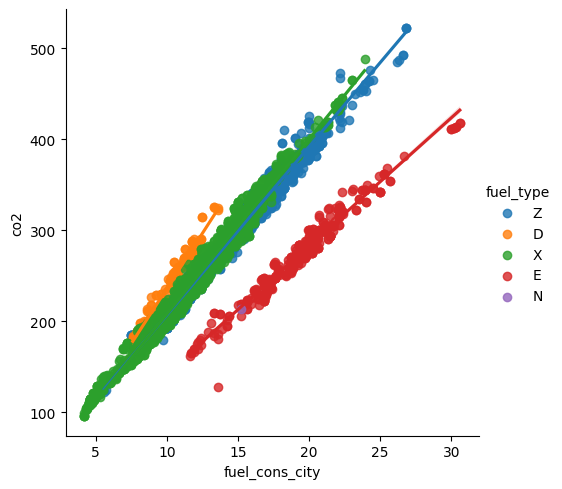

In [149]:
sns.lmplot(x='fuel_cons_city', y='co2', data=data, hue='fuel_type')

#### 2. Instanciar a classe do estimador, **escolhendo os hiperparâmetros desejados**
- Para a primeira versão do modelo, pode ser uma boa escolha utilizar os parâmetros default;
- Veremos mais pra frente como escolher os hiperparâmetros adequadamente;

In [150]:
data.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy', 'co2'],
      dtype='object')

In [151]:
# Instancie aqui ...

In [152]:
#data_numerical = data_numerical.drop(columns='fuel_cons_comb')
data_numerical = data[['co2', 'engine_size', 'cylinders', 'fuel_cons_city', 'fuel_cons_hwy', 'tipo_transmissao']]
# Split data
X = data_numerical.drop(columns='co2')
y = data_numerical['co2']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


KeyError: "['tipo_transmissao'] not in index"

In [ ]:
X_train

### Random Forest

In [ ]:
random_forest = RandomForestRegressor(n_estimators=1000, max_features=0.3)
random_forest.fit(X_train, y_train)
prediction = random_forest.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
print(f'MAE: {mae}')


In [ ]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axis.scatter(y_test, prediction)
axis.set_xlabel('True')
axis.set_ylabel('Predicted')


plt.show()


In [ ]:
print(random_forest.feature_importances_)
print(X_train.columns.to_list())


### Feature importance

In [ ]:
fig_bar, ax_bar = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
importance = random_forest.feature_importances_
var_names = X_train.columns.to_list()

ax_bar.bar(var_names, importance)
plt.show()


#### 3. Separe os dados em **dados de treino** e **dados de teste**.

In [ ]:
# Codigo aqui ...

#### 4. Treine o modelo, usando **os dados de treino**

In [ ]:
# Código aqui ...

#### 5. Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)

In [ ]:
# Código aqui ...

#### 6. **Avalie a performance do modelo com base nas previsões acima**

Lembre que você pode treinar e avaliar muito modelos, e no final escolher aquele que teve melhor performance respeito à metrica escolhida.

In [ ]:
# Código aqui ...